In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import os 
import statsmodels





In [2]:
cw = os.getcwd()
print("Current directory:",cw)

Current directory: C:\Users\Dell\OneDrive\Desktop\ML\Sales-forecast\notebooks


In [3]:
try:
    with open("Data/train.csv", "r") as file:
        content = file.read()
except FileNotFoundError:
    print("File or directory not found!")


File or directory not found!


In [4]:

df = pd.read_csv('../Data/train.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
df.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [6]:
df.shape


(913000, 4)

In [7]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [9]:
print(df.index)

RangeIndex(start=0, stop=913000, step=1)


In [10]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

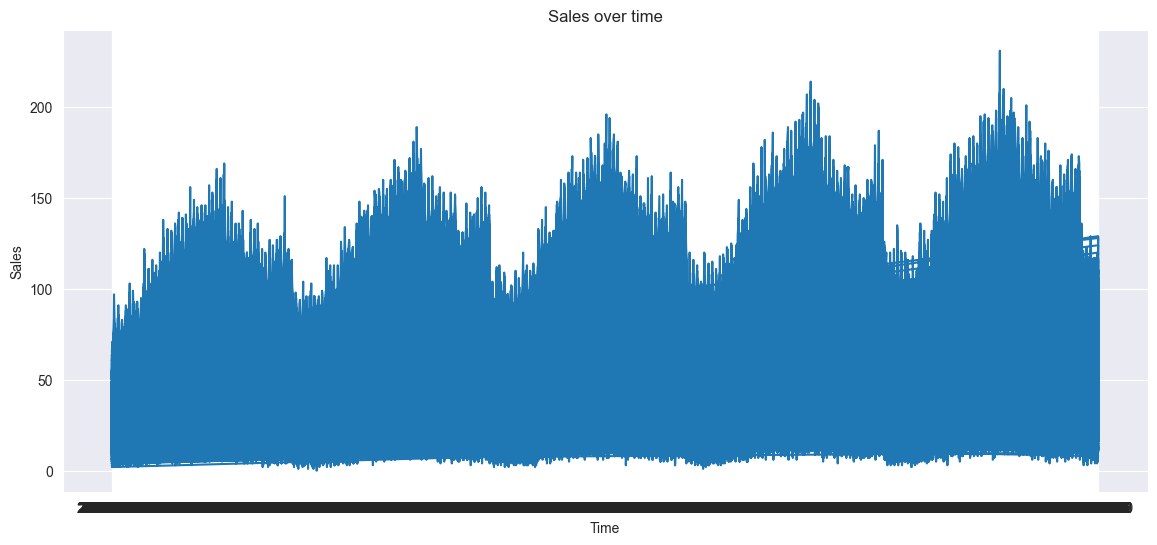

In [11]:
plt.figure(figsize=(14,6))
plt.plot(df['date'],df['sales'])
plt.title('Sales over time')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.grid(True)
plt.show()           

In [12]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

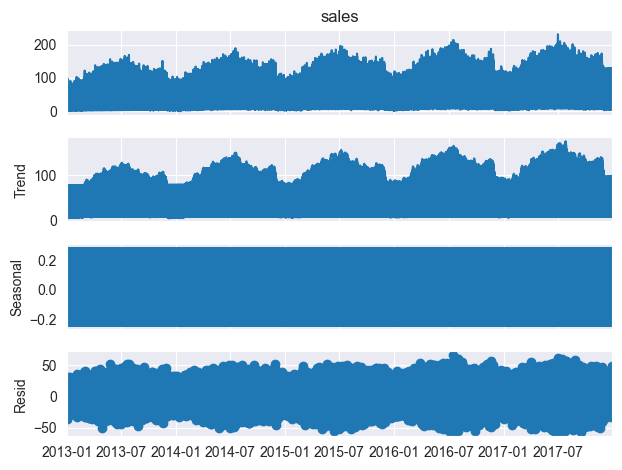

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['sales'], model='additive',period = 7)
result.plot()
plt.show()


In [14]:
df.head()

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-01-02,1,1,11
2013-01-03,1,1,14
2013-01-04,1,1,13
2013-01-05,1,1,10


In [15]:
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


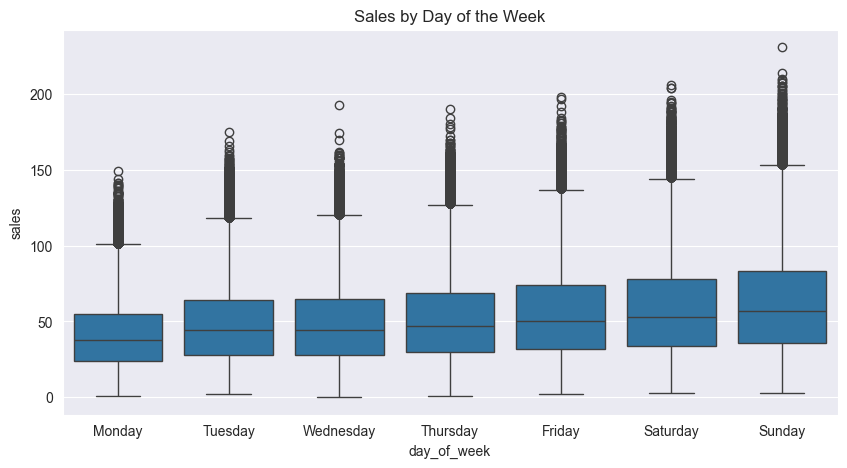

In [16]:
df['day_of_week'] = df.index.day_name()
df['month'] = df.index.month_name()


plt.figure(figsize=(10,5))
sns.boxplot(x='day_of_week', y='sales', data=df,
            order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Sales by Day of the Week")
plt.show()

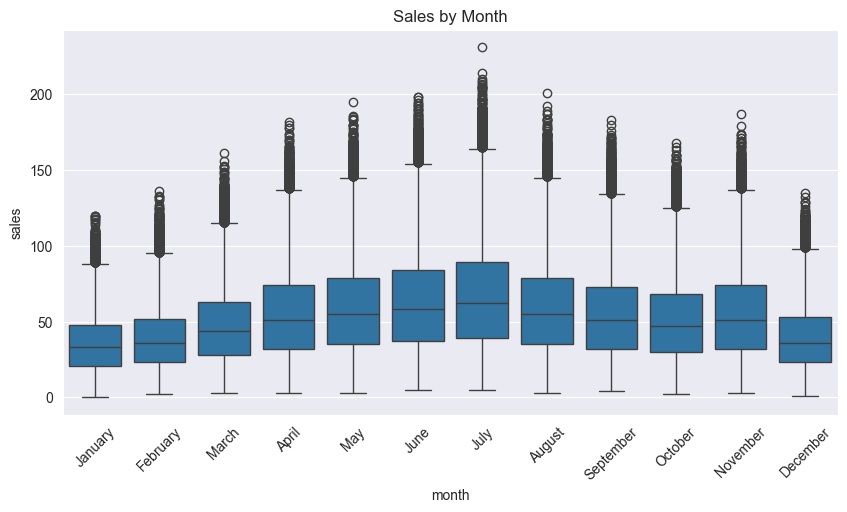

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='month', y='sales', data=df,
            order=['January','February','March','April','May','June','July','August',
                   'September','October','November','December'])
plt.title("Sales by Month")
plt.xticks(rotation=45)
plt.show()